# Visualizing distributions of data

An early step in any effort to analyze or model data should be to understand how the variables are distributed. Techniques for distribution visualization can provide quick answers to many important questions. What range do the observations cover? What is their central tendency? Are they heavily skewed in one direction? Is there evidence for bimodality? Are there significant outliers? Do the answers to these questions vary across subsets defined by other variables?

The :ref:`distributions module <distribution_api>` contains several functions designed to answer questions such as these. The axes-level functions are :func:`histplot`, :func:`kdeplot`, :func:`ecdfplot`, and :func:`rugplot`. They are grouped together within the figure-level :func:`displot`, :func:`jointplot`, and :func:`pairplot` functions.

There are several different approaches to visualizing a distribution, and each has its relative advantages and drawbacks. It is important to understand these factors so that you can choose the best approach for your particular aim.

In [1]:
!pip install -q -r requirements.txt

In [2]:
%matplotlib inline
import seaborn as sns; sns.set_theme()

## Plotting univariate histograms
------------------------------

Perhaps the most common approach to visualizing a distribution is the *histogram*. This is the default approach in :func:`displot`, which uses the same underlying code as :func:`histplot`. A histogram is a bar plot where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar:

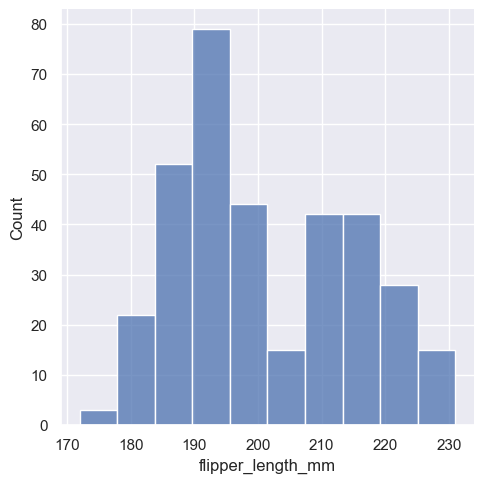

In [3]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

This plot immediately affords a few insights about the ``flipper_length_mm`` variable. For instance, we can see that the most common flipper length is about 195 mm, but the distribution appears bimodal, so this one number does not represent the data well.

###Choosing the bin size

The size of the bins is an important parameter, and using the wrong bin size can mislead by obscuring important features of the data or by creating apparent features out of random variability. By default, :func:`displot`/:func:`histplot` choose a default bin size based on the variance of the data and the number of observations. But you should not be over-reliant on such automatic approaches, because they depend on particular assumptions about the structure of your data. It is always advisable to check that your impressions of the distribution are consistent across different bin sizes. To choose the size directly, set the `binwidth` parameter:

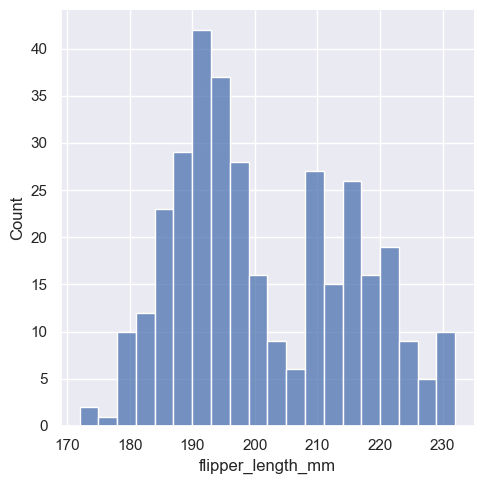

In [4]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

In other circumstances, it may make more sense to specify the *number* of bins, rather than their size:

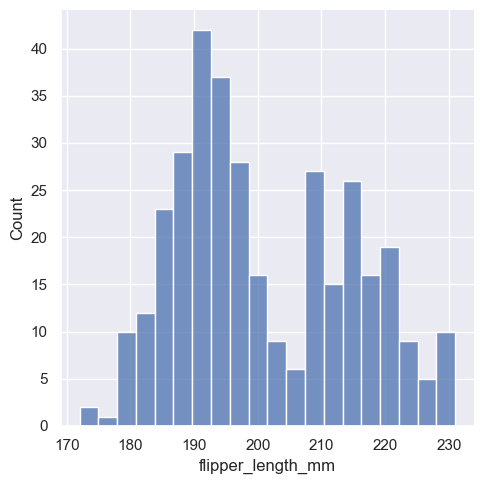

In [5]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

One example of a situation where defaults fail is when the variable takes a relatively small number of integer values. In that case, the default bin width may be too small, creating awkward gaps in the distribution:

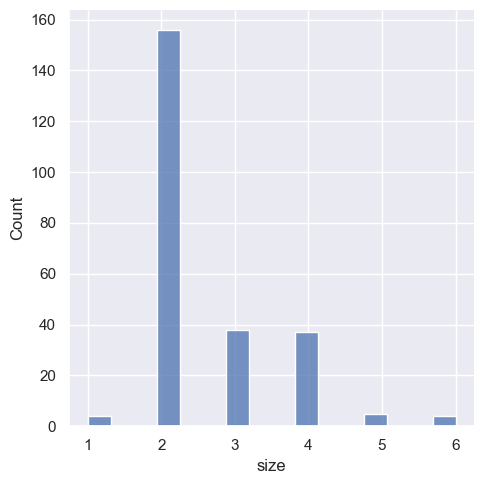

In [6]:
tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

One approach would be to specify the precise bin breaks by passing an array to ``bins``:

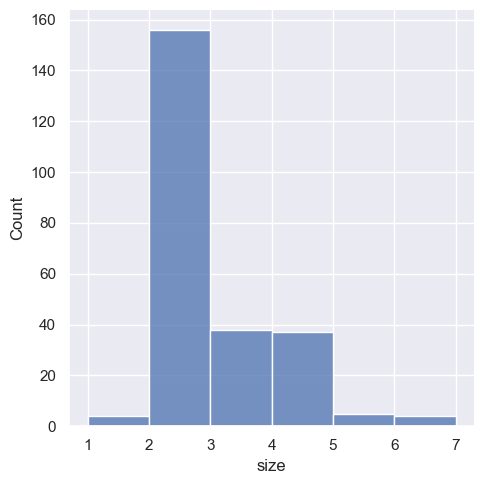

In [7]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

This can also be accomplished by setting ``discrete=True``, which chooses bin breaks that represent the unique values in a dataset with bars that are centered on their corresponding value.

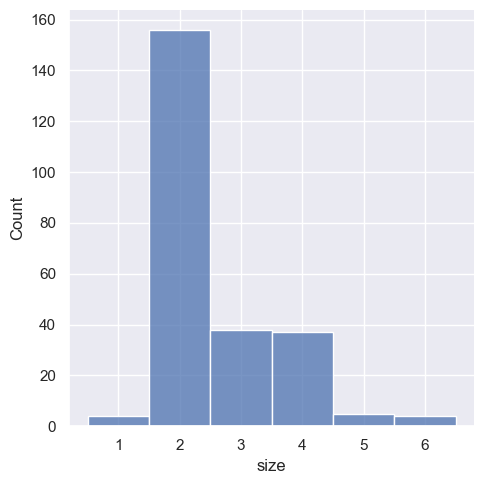

In [8]:
sns.displot(tips, x="size", discrete=True)

It's also possible to visualize the distribution of a categorical variable using the logic of a histogram. Discrete bins are automatically set for categorical variables, but it may also be helpful to "shrink" the bars slightly to emphasize the categorical nature of the axis:

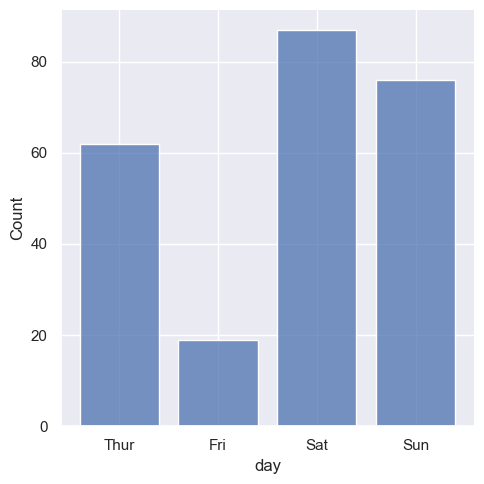

In [9]:
sns.displot(tips, x="day", shrink=.8)

## Conditioning on other variables

Once you understand the distribution of a variable, the next step is often to ask whether features of that distribution differ across other variables in the dataset. For example, what accounts for the bimodal distribution of flipper lengths that we saw above? :func:`displot` and :func:`histplot` provide support for conditional subsetting via the ``hue`` semantic. Assigning a variable to ``hue`` will draw a separate histogram for each of its unique values and distinguish them by color:

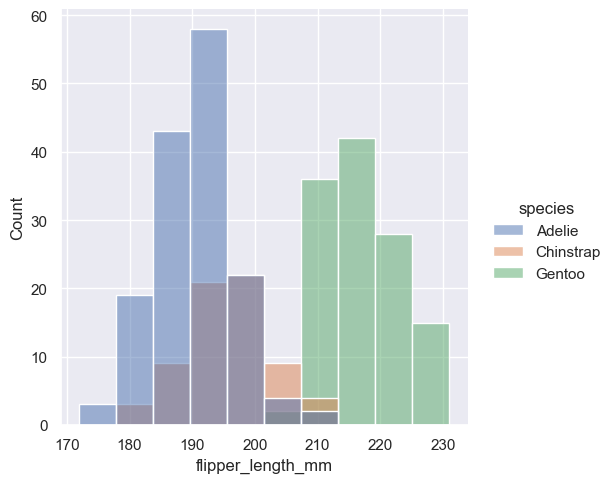

In [10]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

By default, the different histograms are "layered" on top of each other and, in some cases, they may be difficult to distinguish. One option is to change the visual representation of the histogram from a bar plot to a "step" plot:

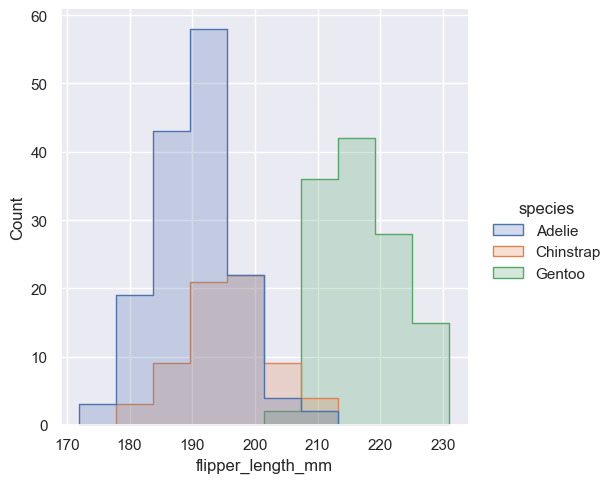

In [11]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

Alternatively, instead of layering each bar, they can be "stacked", or moved vertically. In this plot, the outline of the full histogram will match the plot with only a single variable:

C:\Users\schatzm\Anaconda3\envs\julab\lib\site-packages\seaborn\distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


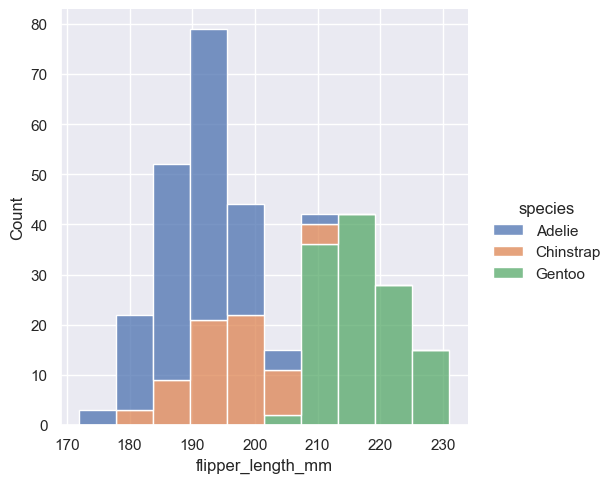

In [12]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

The stacked histogram emphasizes the part-whole relationship between the variables, but it can obscure other features (for example, it is difficult to determine the mode of the Adelie distribution. Another option is "dodge" the bars, which moves them horizontally and reduces their width. This ensures that there are no overlaps and that the bars remain comparable in terms of height. But it only works well when the categorical variable has a small number of levels:

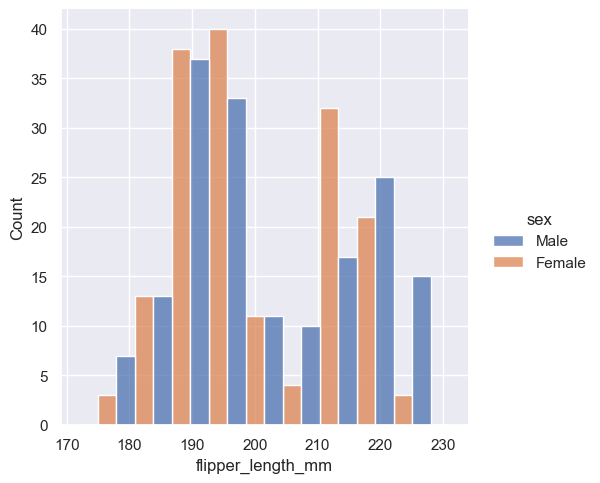

In [13]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

Because :func:`displot` is a figure-level function and is drawn onto a :class:`FacetGrid`, it is also possible to draw each individual distribution in a separate subplot by assigning the second variable to ``col`` or ``row`` rather than (or in addition to) ``hue``. This represents the distribution of each subset well, but it makes it more difficult to draw direct comparisons:

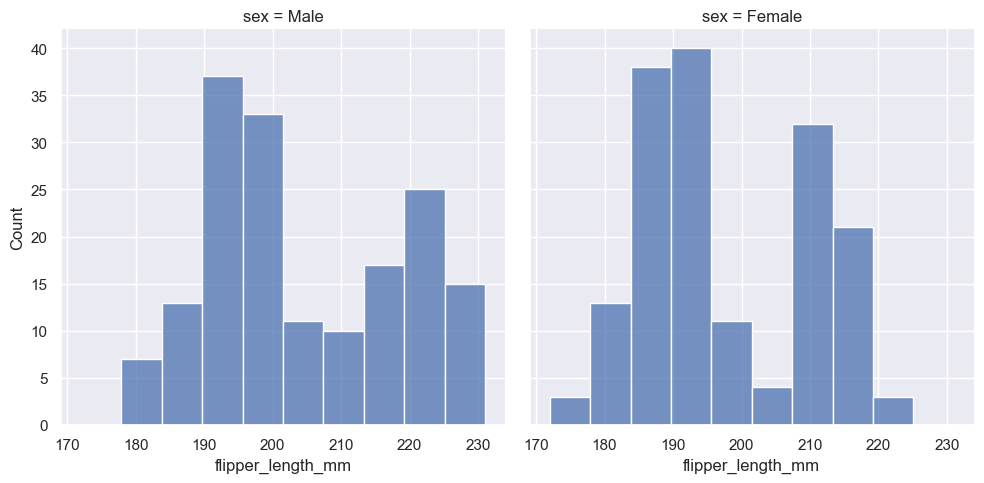

In [14]:
sns.displot(penguins, x="flipper_length_mm", col="sex")

None of these approaches are perfect, and  we will soon see some alternatives to a histogram that are better-suited to the task of comparison.

## Normalized histogram statistics

Before we do, another point to note is that, when the subsets have unequal numbers of observations, comparing their distributions in terms of counts may not be ideal. One solution is to *normalize* the counts using the ``stat`` parameter:

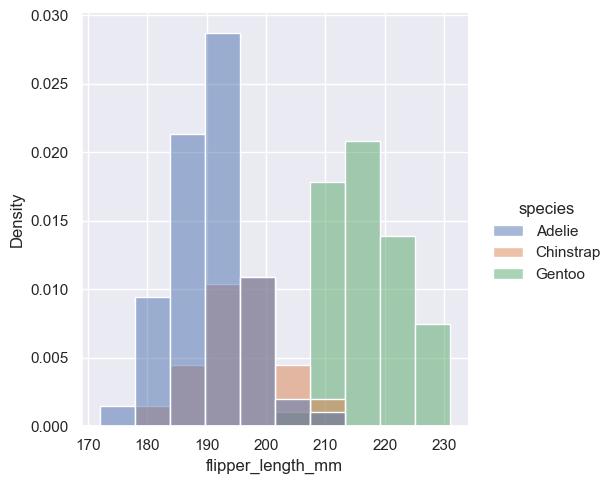

In [15]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

By default, however, the normalization is applied to the entire distribution, so this simply rescales the height of the bars. By setting ``common_norm=False``, each subset will be normalized independently:

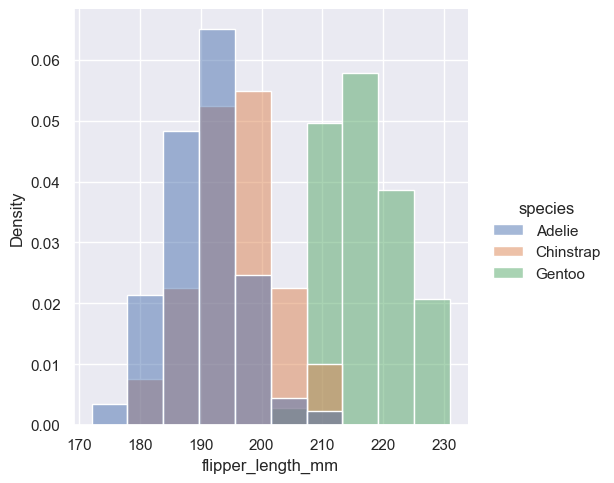

In [16]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False)

Density normalization scales the bars so that their *areas* sum to 1. As a result, the density axis is not directly interpretable. Another option is to normalize the bars to that their *heights* sum to 1. This makes most sense when the variable is discrete, but  it is an option for all histograms:

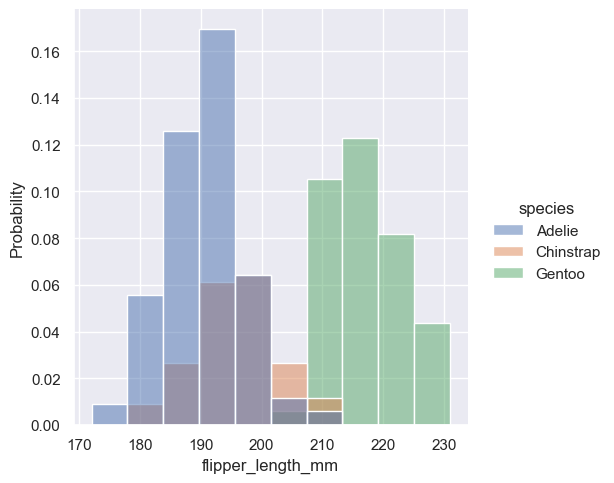

In [17]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability")

## Kernel density estimation


A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

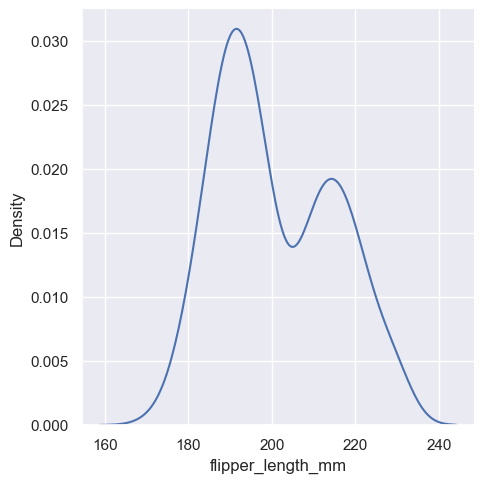

In [18]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

### Choosing the smoothing bandwidth

Much like with the bin size in the histogram, the ability of the KDE to accurately represent the data depends on the choice of smoothing bandwidth. An over-smoothed estimate might erase meaningful features, but an under-smoothed estimate can obscure the true shape within random noise. The easiest way to check the robustness of the estimate is to adjust the default bandwidth:

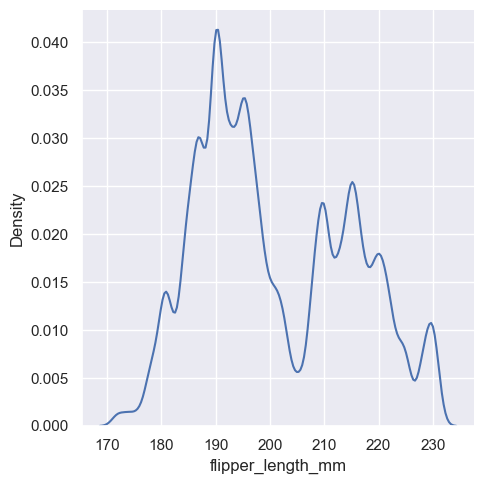

In [19]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

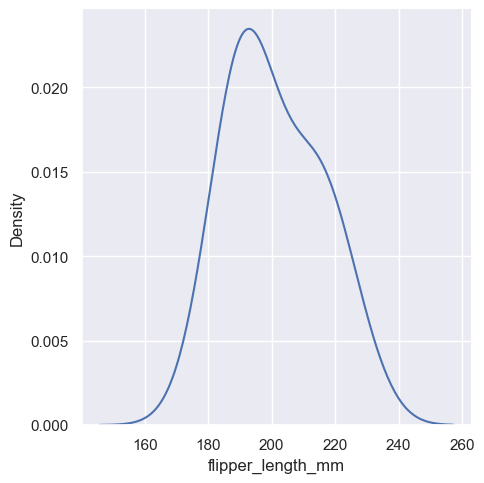

In [20]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

### Conditioning on other variables

As with histograms, if you assign a ``hue`` variable, a separate density estimate will be computed for each level of that variable:

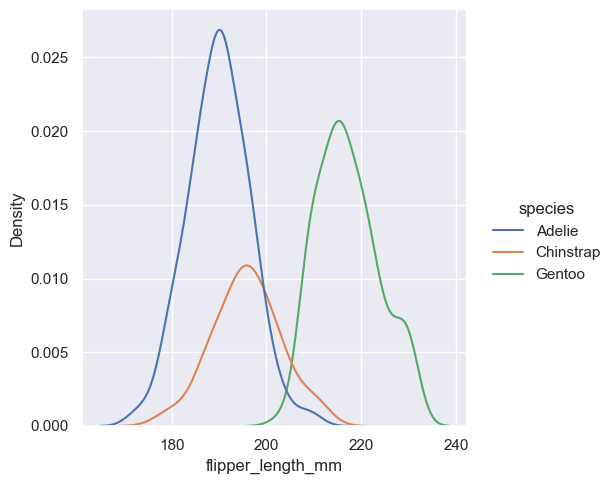

In [21]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

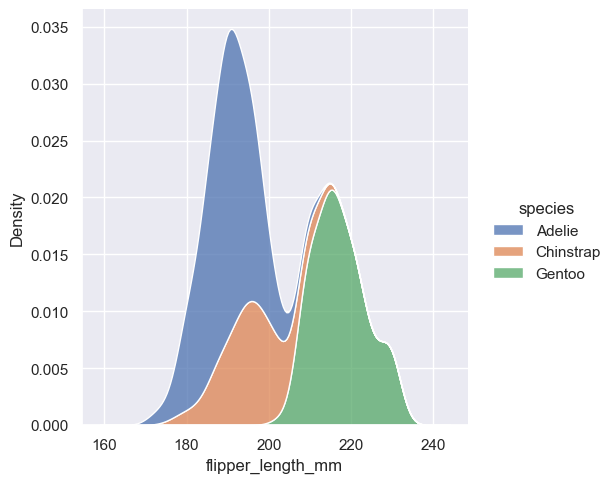

In [22]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

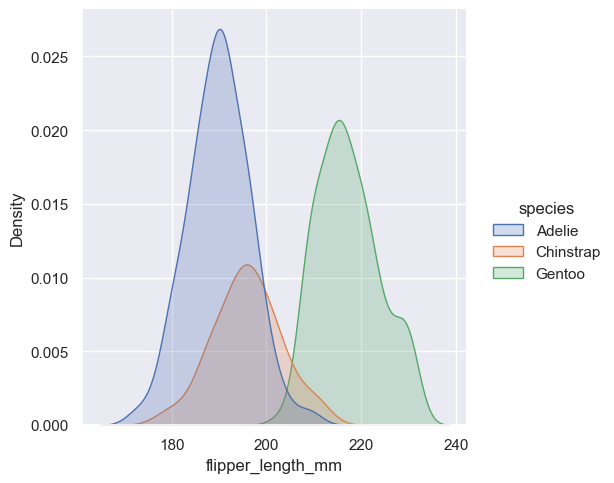

In [23]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

### Kernel density estimation pitfalls

KDE plots have many advantages. Important features of the data are easy to discern (central tendency, bimodality, skew), and they afford easy comparisons between subsets. But there are also situations where KDE poorly represents the underlying data. This is because the logic of KDE assumes that the underlying distribution is smooth and unbounded. One way this assumption can fail is when a variable reflects a quantity that is naturally bounded. If there are observations lying close to the bound (for example, small values of a variable that cannot be negative), the KDE curve may extend to unrealistic values:

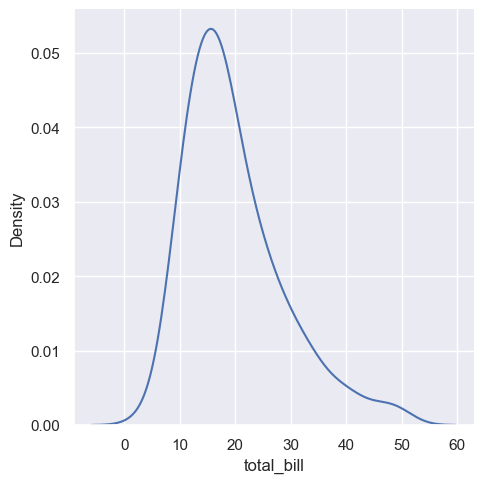

In [24]:
sns.displot(tips, x="total_bill", kind="kde")

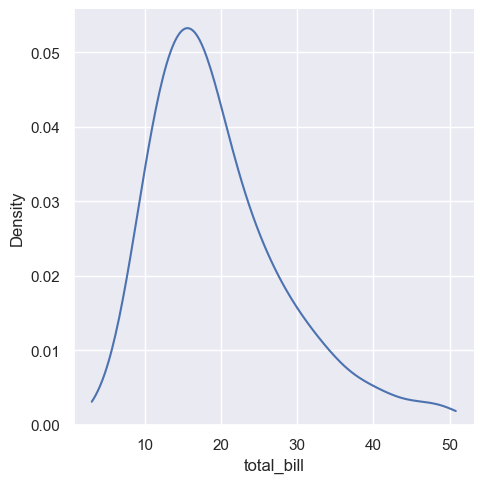

In [25]:
sns.displot(tips, x="total_bill", kind="kde", cut=0)

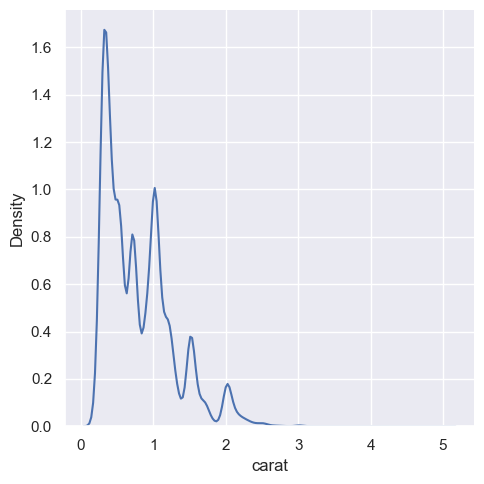

In [26]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde")

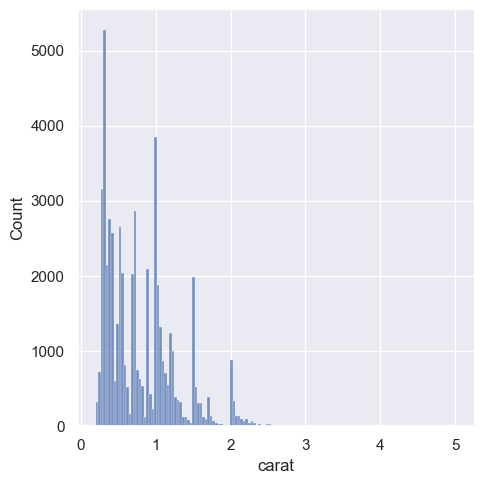

In [27]:
sns.displot(diamonds, x="carat")

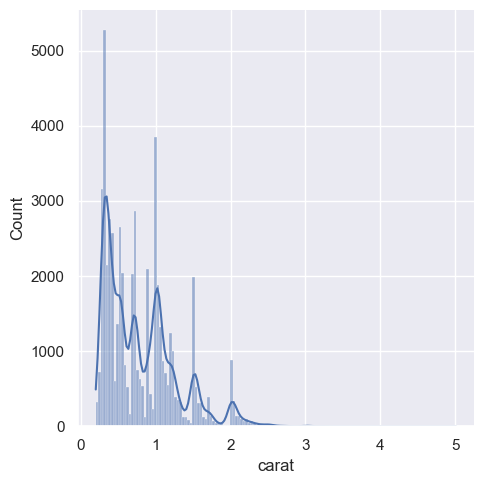

In [28]:
sns.displot(diamonds, x="carat", kde=True)

## Empirical cumulative distributions

A third option for visualizing distributions computes the "empirical cumulative distribution function" (ECDF). This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value:

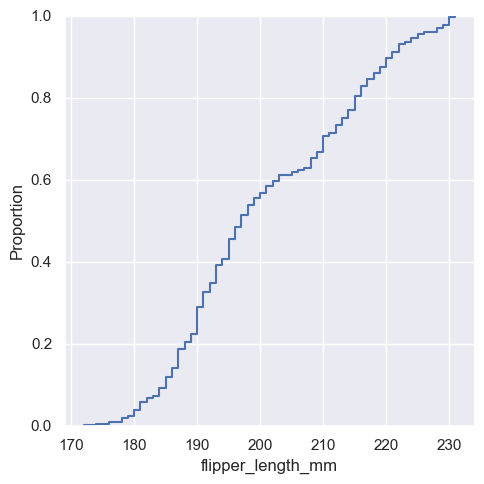

In [29]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

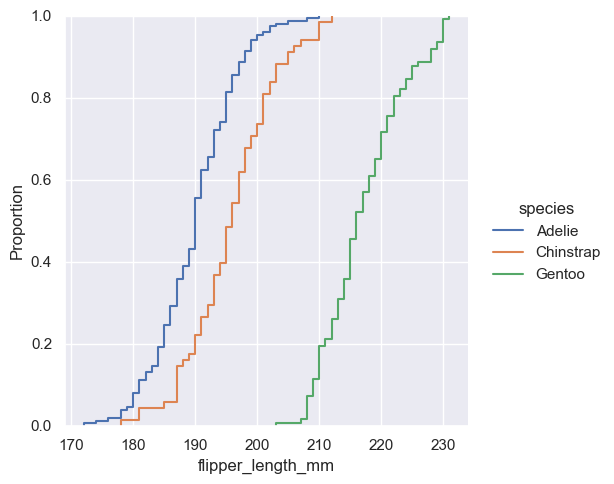

In [30]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

## Visualizing bivariate distributions

All of the examples so far have considered *univariate* distributions: distributions of a single variable, perhaps conditional on a second variable assigned to ``hue``. Assigning a second variable to ``y``, however, will plot a *bivariate* distribution:

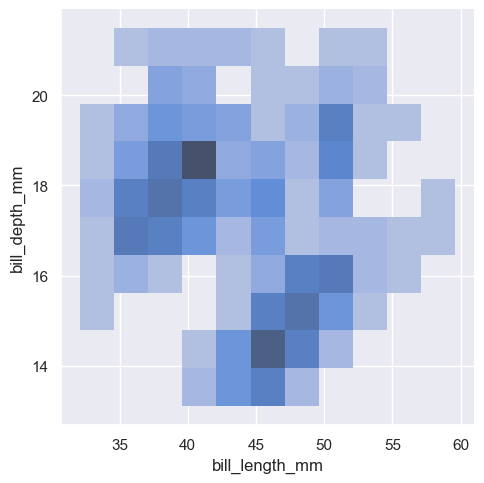

In [31]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

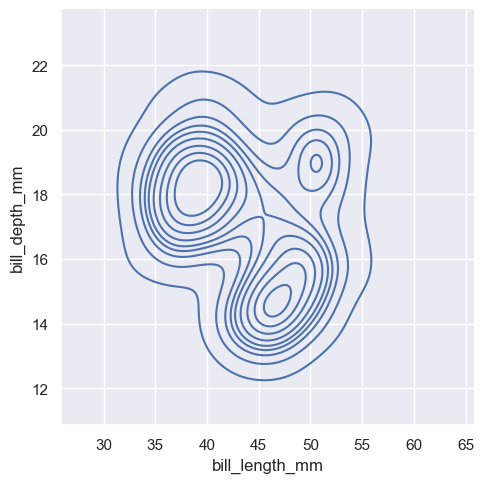

In [32]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

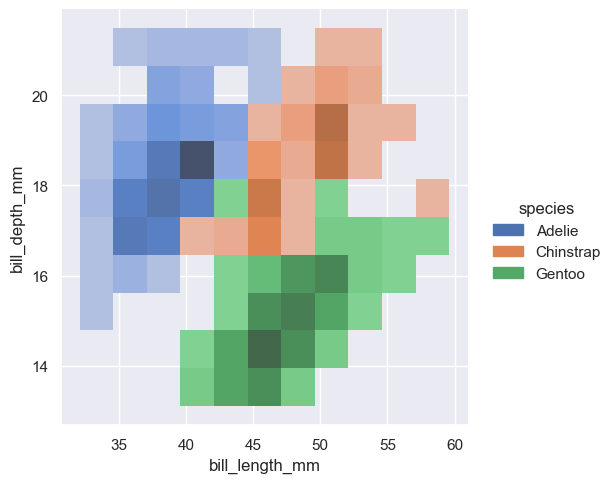

In [33]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

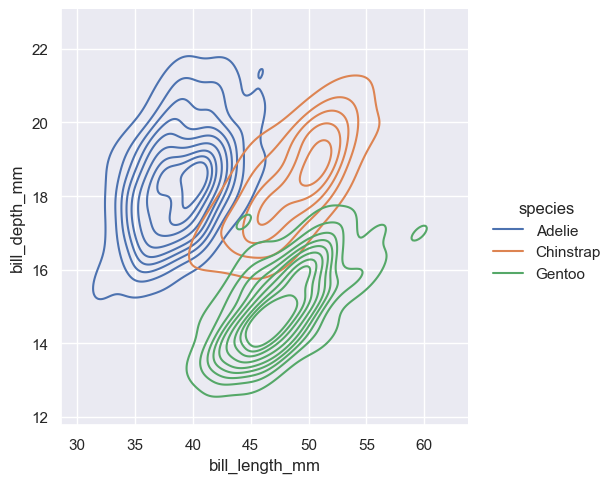

In [34]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

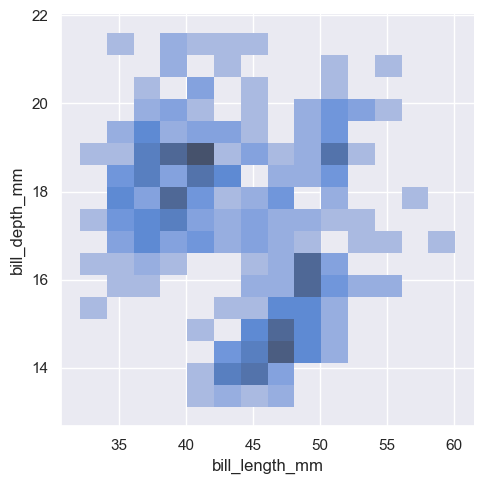

In [35]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5))

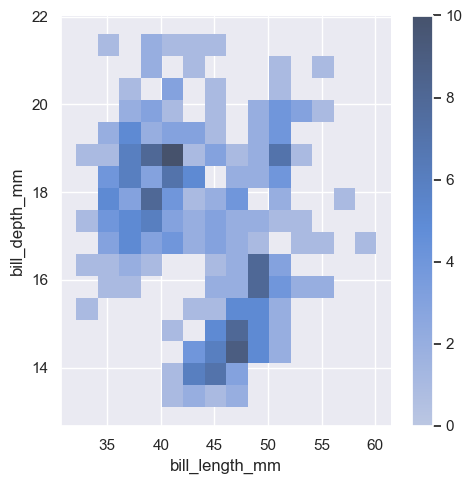

In [36]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

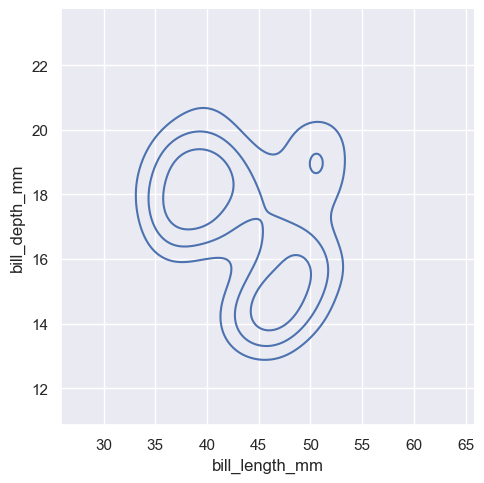

In [37]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=.2, levels=4)

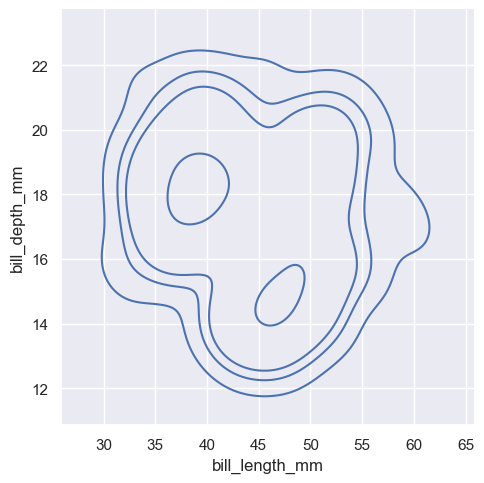

In [38]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", levels=[.01, .05, .1, .8])

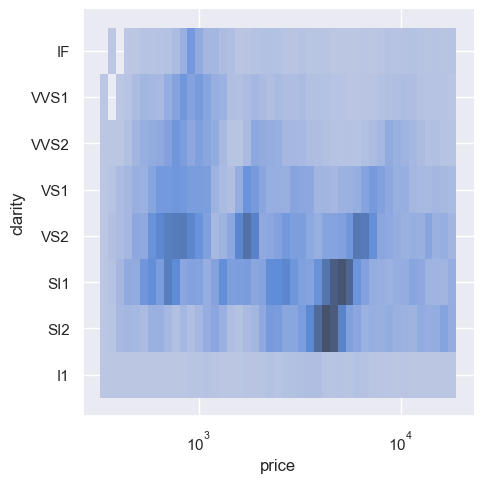

In [39]:
sns.displot(diamonds, x="price", y="clarity", log_scale=(True, False))

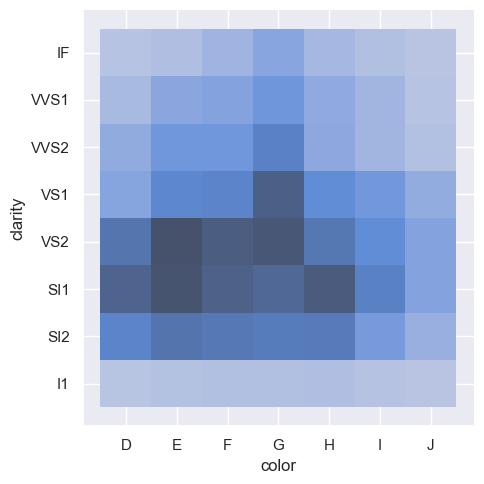

In [40]:
sns.displot(diamonds, x="color", y="clarity")

## Distribution visualization in other settings

Several other figure-level plotting functions in seaborn make use of the :func:`histplot` and :func:`kdeplot` functions.


### Plotting joint and marginal distributions

The first is :func:`jointplot`, which augments a bivariate relatonal or distribution plot with the marginal distributions of the two variables. By default, :func:`jointplot` represents the bivariate distribution using :func:`scatterplot` and the marginal distributions using :func:`histplot`:

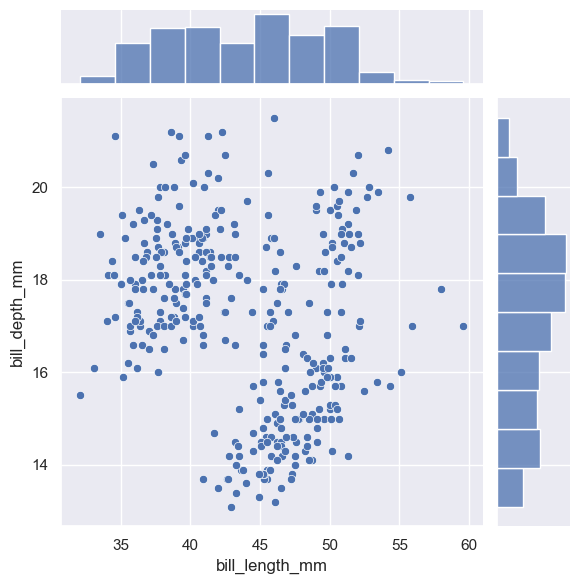

In [41]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

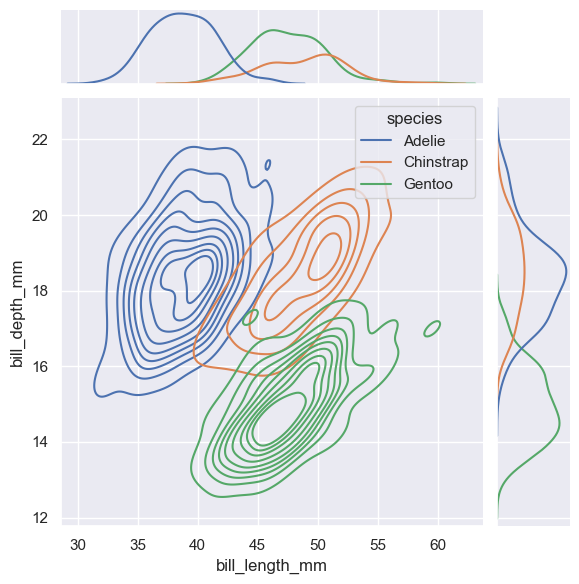

In [42]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

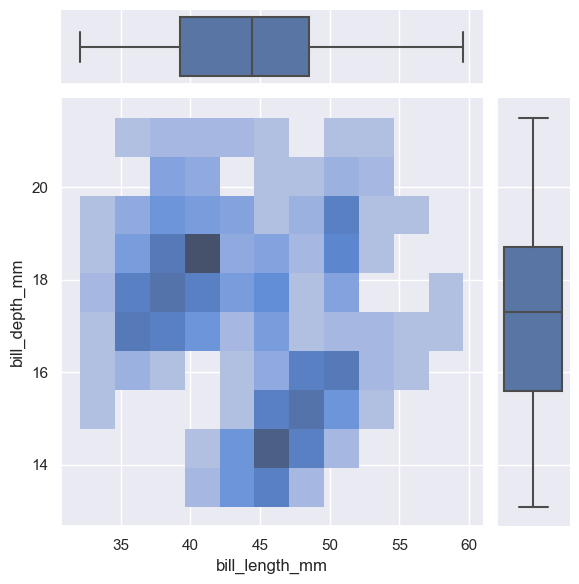

In [43]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

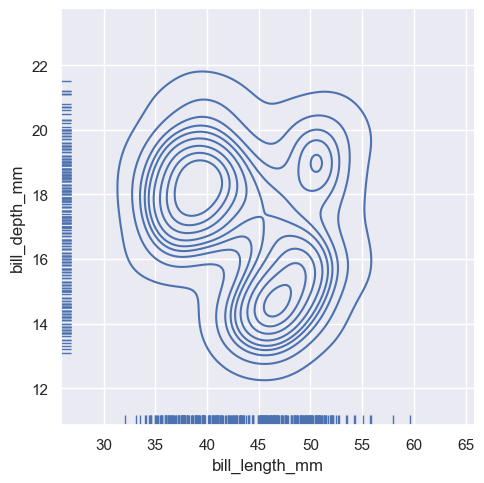

In [44]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

And the axes-level :func:`rugplot` function can be used to add rugs on the side of any other kind of plot:

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

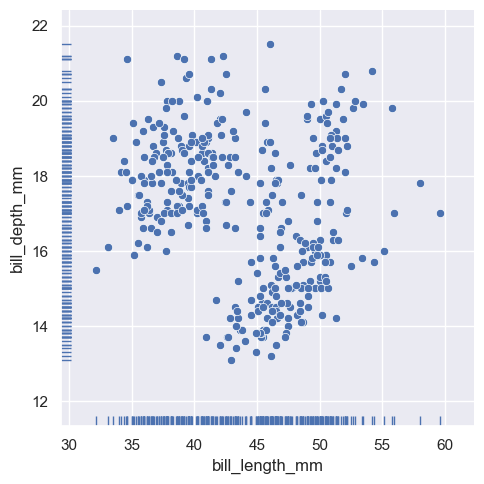

In [45]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

### Plotting many distributions

The :func:`pairplot` function offers a similar blend of joint and marginal distributions. Rather than focusing on a single relationship, however, :func:`pairplot` uses a "small-multiple" approach to visualize the univariate distribution of all variables in a dataset along with all of their pairwise relationships:

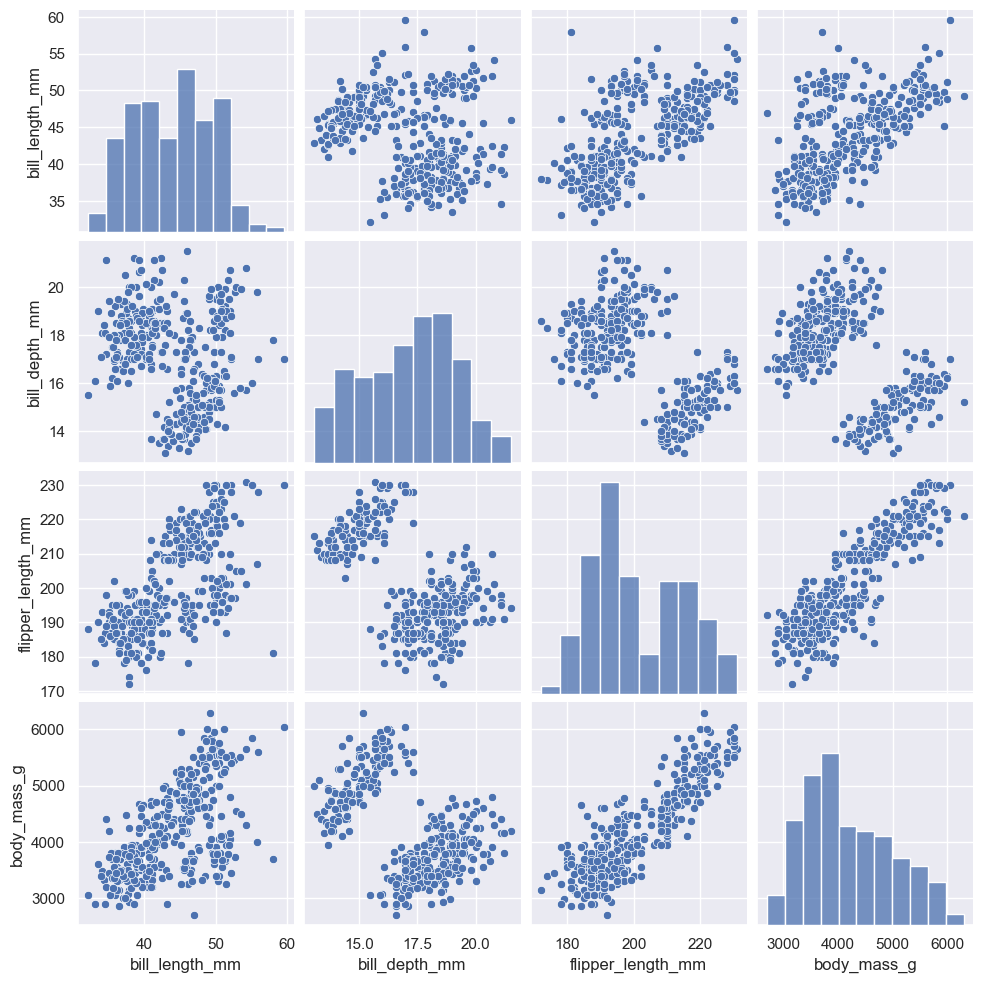

In [46]:
sns.pairplot(penguins)

As with :func:`jointplot`/:class:`JointGrid`, using the underlying :class:`PairGrid` directly will afford more flexibility with only a bit more typing:

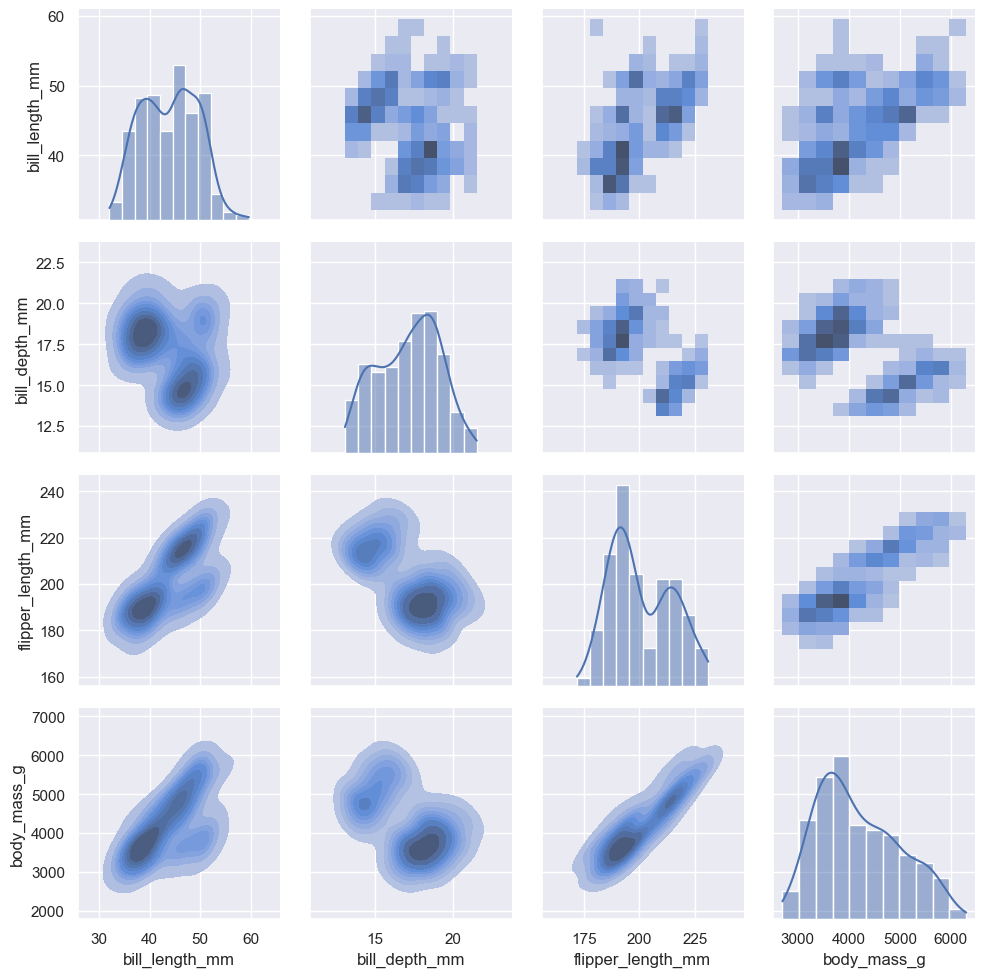

In [47]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [48]:
from watermark import watermark
watermark(iversions=True, globals_=globals())
print(watermark())
print(watermark(packages="watermark,numpy,pandas,matplotlib,bokeh,altair,plotly"))

Last updated: 2023-01-05T12:26:05.313030+01:00

Python implementation: CPython
Python version       : 3.9.15
IPython version      : 8.8.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 85 Stepping 7, GenuineIntel
CPU cores   : 40
Architecture: 64bit

watermark : 2.3.1
numpy     : 1.24.1
pandas    : 1.5.2
matplotlib: 3.6.2
bokeh     : 3.0.3
altair    : 4.2.0
plotly    : 5.11.0

